In [17]:
text = open('F:/Machine Learning/Projects/BBC/bbc/test/business/311.txt').read()
text

'Stormy year for property insurers\n\nA string of storms, typhoons and earthquakes has made 2004 the most expensive year on record for property insurers, according to Swiss Re.\n\nThe world\'s second biggest insurer said disasters around the globe have seen property claims reach $42bn (\xc2\xa321.5bn). "2004 reinforces the trend towards higher losses," said Swiss Re. Tightly packed populations in the areas involved in natural and man-made disasters were to partly to blame for the rise in claims, it said. Some 95% of insurance claims were for natural catastrophes, with the rest attributed to made-made events.\n\nThe largest claims came from the US, which was struck by four hurricanes, and Japan, which suffered the highest concentration of typhoons for decades plus a major earthquake.\n\nEurope suffered fewer natural disasters, but 191 people were killed and more than 2,000 injured in March after the terrorist attack on train stations in Madrid. The damages claimed in 2004 eclipsed previ

In [141]:
import pandas as pd

In [52]:
text_uni = text.decode('utf-8')
text_normal = text_uni.encode('ascii','ignore')
print (text_normal)

Stormy year for property insurers

A string of storms, typhoons and earthquakes has made 2004 the most expensive year on record for property insurers, according to Swiss Re.

The world's second biggest insurer said disasters around the globe have seen property claims reach $42bn (21.5bn). "2004 reinforces the trend towards higher losses," said Swiss Re. Tightly packed populations in the areas involved in natural and man-made disasters were to partly to blame for the rise in claims, it said. Some 95% of insurance claims were for natural catastrophes, with the rest attributed to made-made events.

The largest claims came from the US, which was struck by four hurricanes, and Japan, which suffered the highest concentration of typhoons for decades plus a major earthquake.

Europe suffered fewer natural disasters, but 191 people were killed and more than 2,000 injured in March after the terrorist attack on train stations in Madrid. The damages claimed in 2004 eclipsed previous years, includi

In [53]:
type(text_normal)

str

In [54]:
text_split = text_normal.splitlines()
text_split[0].split()

['Stormy', 'year', 'for', 'property', 'insurers']

In [70]:
text_two = text_split[:6]
text_two

['Stormy year for property insurers',
 '',
 'A string of storms, typhoons and earthquakes has made 2004 the most expensive year on record for property insurers, according to Swiss Re.',
 '',
 'The world\'s second biggest insurer said disasters around the globe have seen property claims reach $42bn (21.5bn). "2004 reinforces the trend towards higher losses," said Swiss Re. Tightly packed populations in the areas involved in natural and man-made disasters were to partly to blame for the rise in claims, it said. Some 95% of insurance claims were for natural catastrophes, with the rest attributed to made-made events.',
 '']

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

In [72]:
vectorizer = CountVectorizer()
vectorizer

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [75]:
fit_data = vectorizer.fit_transform(text_two)
pd.DataFrame(fit_data.todense())

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,1,0,0,0,...,1,0,1,0,0,1,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,0,1,1,1,1,...,6,1,3,1,1,0,2,1,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
from sklearn.feature_extraction.text import TfidfTransformer

In [94]:
transform = TfidfTransformer(use_idf=True,smooth_idf=False,sublinear_tf=False)

In [95]:
tfidf = transform.fit_transform(fit_data)

In [96]:
tfidf.toarray()


array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.3582567 ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.44404994,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.3582567 ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.59071446,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.44404994],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.

In [134]:
root_file = r'F:\Machine Learning\Projects\BBC\bbc\test'

In [135]:
onlyfiles = os.listdir(root_file)

In [137]:
all_five = [os.path.join(root_file, i) for i in onlyfiles]

In [139]:
x = []
y = []
for j in all_five:
    text_path = os.listdir(j)
    for each in text_path:
        current_path = os.path.join(j,each)
        read_file = open(current_path,'r').read()
        x.append(read_file)
        y.append(os.path.basename(j))
        
    

In [152]:
fit_english = vectorizer.fit_transform(x)

In [154]:
fit_english.shape

(850, 19658)

In [155]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import confusion_matrix 

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
x_train,x_test,y_train,y_test = train_test_split(fit_english,y,test_size=0.20)

In [163]:
model = RandomForestClassifier(n_estimators=500)

In [167]:
model = SVC(ker)

In [173]:
model = GradientBoostingClassifier()

In [175]:
model = KNeighborsClassifier(n_neighbors = 1)

In [177]:
model = GaussianNB()

In [182]:
model = LogisticRegression()

In [183]:
model.fit(x_train,y_train)
print (model.score(x_test,y_test))

0.964705882353


In [184]:
from collections import Counter

In [185]:
Counter(y)

Counter({'business': 200,
         'entertainment': 140,
         'politics': 160,
         'sport': 200,
         'tech': 150})

In [190]:
import matplotlib.pyplot as plt

(array([ 200.,    0.,  140.,    0.,    0.,  160.,    0.,  200.,    0.,  150.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

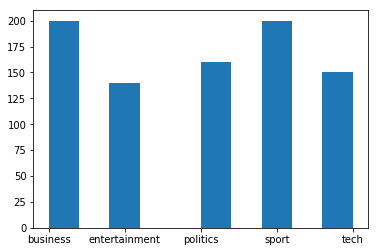

In [191]:
plt.hist(y)